## Batch Normalisation:-Mini batch Gradient Decent.
```
* By using this method our training is so fast.
* And our model should be stable.
* Internal Covarriance shift.

# Batch normalization

### Issues with training Deep Neural Networks 

- There are 2 major issues 1) Internal Covariate shift, 2) Vanishing Gradient

### Internal Covariate shift

- The concept of covariate shift pertains to the change that occurs in the distribution of the input to a learning system. In deep networks, this distribution can be influenced by parameters across all input layers. Consequently, even minor changes in the network can have a significant impact on its output. This effect gets magnified as the signal propagates through the network, which can result in a shift in the distribution of the inputs to internal layers. This phenomenon is known as internal covariate shift.

- When inputs are whitened (i.e., have zero mean and unit variance) and are uncorrelated, they tend to converge faster during training. However, internal covariate shift can have the opposite effect, as it introduces changes to the distribution of inputs that can slow down convergence. Therefore, to mitigate this effect, techniques like batch normalization have been developed to normalize the inputs to each layer in the network based on statistics of the current mini-batch.

### Vanishing Gradient

- Saturating non-linearities such as sigmoid or tanh are not suitable for deep networks, as the signal tends to get trapped in the saturation region as the network grows deeper. This makes it difficult for the network to learn and can result in slow convergence during training. To overcome this problem we can use the following.

- Non-linearities like ReLU which do not saturate.
- Smaller learning rates
- Careful initializations
---
### What is Normalization?

- Normalization in deep learning refers to the process of transforming the input or output of a layer in a neural network to improve its performance during training. The most common type of normalization used in deep learning is batch normalization, which normalizes the activations of a layer for each mini-batch during training.
---
### What is batch normalization?

- Batch normalization is a technique in deep learning that helps to standardize and normalize the input to each layer of a neural network by adjusting and scaling the activations. The idea behind batch normalization is to normalize the inputs to a layer to have zero mean and unit variance across each mini-batch of the training data.

### Steps involved in batch normalization

1) During training, for each mini-batch of data, compute the mean and variance of the activations of each layer. This can be done using the following formulas:

- Mean: $\mu_B = \frac{1}{m} \sum_{i=1}^m x_i$

- Variance: $\sigma_B^2 = \frac{1}{m} \sum_{i=1}^m (x_i - \mu_B)^2$

- Here, $m$ is the size of the mini-batch, and $x_i$ is the activation of the $i$-th neuron in the layer.

2) Normalize the activations of each layer in the mini-batch using the following formula:

- $\hat{x_i} = \frac{x_i - \mu_B}{\sqrt{\sigma_B^2 + \epsilon}}$
Here, $\epsilon$ is a small constant added for numerical stability.

3) Scale and shift the normalized activations using the learned parameters $\gamma$ and $\beta$, respectively:

- $y_i = \gamma \hat{x_i} + \beta$
- The parameters $\gamma$ and $\beta$ are learned during training using backpropagation.

4) During inference, the running mean and variance of each layer are used for normalization instead of the mini-batch statistics. These running statistics are updated using a moving average of the mini-batch statistics during training.
---
### The benefits of batch normalization include:

- Improved training performance: Batch normalization reduces the internal covariate shift, which is the change in the distribution of the activations of each layer due to changes in the distribution of the inputs. This allows the network to converge faster and with more stable gradients.

- Regularization: Batch normalization acts as a form of regularization by adding noise to the activations of each layer, which can help prevent overfitting.

- Increased robustness: Batch normalization makes the network more robust to changes in the input distribution, which can help improve its generalization performance.
---
### Code example for batch normalization

```python
import tensorflow as tf

# Define a fully connected layer
fc_layer = tf.keras.layers.Dense(units=128, activation='relu')

# Add batch normalization to the layer
bn_layer = tf.keras.layers.BatchNormalization()

# Define the model with the layer and batch normalization
model = tf.keras.models.Sequential([fc_layer, bn_layer])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy')

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=10)
```

- In the above code,the tf.keras.layers.BatchNormalization() layer is added after the fully connected layer to normalize the output before passing it to the activation function. The model.fit() function is then used to train the model using batch normalization.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Flatten,BatchNormalization

In [2]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

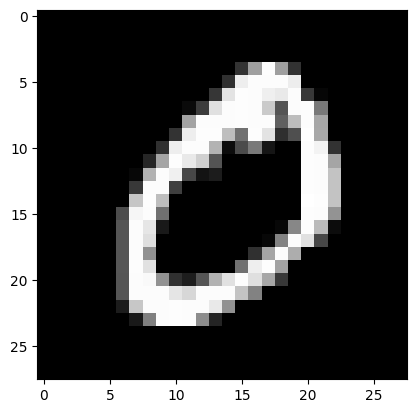

In [3]:
plt.imshow(X_train[1],cmap="gray")

In [4]:
x_valid,x_train=X_train[:5000]/255.,X_train[5000:]/255.
y_valid,y_train=Y_train[:5000],Y_train[5000:]
x_test=X_test/255.
y_test=Y_test

In [5]:
LAYERS=[
    keras.layers.Flatten(input_shape=[28,28],name="inputlayers"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300,activation="relu",name="HiddenLayer1"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100,activation="relu",name="HiddenLayer2"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10,activation="softmax",name="Outputlayer"),
]

e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model=Sequential(LAYERS)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputlayers (Flatten)           │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ HiddenLayer1 (Dense)            │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ HiddenLayer2 (Dense)            │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Outputlayer (Dense)             │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271,346 (1.04 MB)

 Trainable params: 268,978 (1.03 MB)

 Non-trainable params: 2,368 (9.25 KB)

In [7]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [8]:
model.fit(x_train,y_train,validation_data=(x_valid,y_valid),epochs=30,batch_size=128)

Epoch 1/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8782 - loss: 0.4031 - val_accuracy: 0.9702 - val_loss: 0.0986
Epoch 2/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9763 - loss: 0.0838 - val_accuracy: 0.9724 - val_loss: 0.0929
Epoch 3/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9860 - loss: 0.0475 - val_accuracy: 0.9744 - val_loss: 0.0880
Epoch 4/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9907 - loss: 0.0320 - val_accuracy: 0.9732 - val_loss: 0.0859
Epoch 5/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9928 - loss: 0.0244 - val_accuracy: 0.9776 - val_loss: 0.0817
Epoch 6/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9933 - loss: 0.0207 - val_accuracy: 0.9772 - val_loss: 0.0800
Epoch 7/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9947 - loss: 0.0183 - val_accuracy: 0.9810 - val_loss: 0.0712
Epoch 8/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9954 - loss: 0.0162 - val_accuracy: 0